# Red Wine Quality Analysis

Dataset Used - https://www.kaggle.com/code/abdelruhmanessam/wine-quality

### 1. Libraries and Dataset

In [82]:
# Import required Libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warning Flag
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Load Dataset

wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Preprocessing

In [84]:
# Shape of Dataset
wine_df.shape

(1599, 12)

In [85]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Note :-** All the featrues are numerical and none of them is categorical hence there is no need to do apply any encoding techniques.

In [86]:
# Descriptive Statistics
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Note :-** All the features are in comparable range and there is no need to apply normalisation or standardisation.

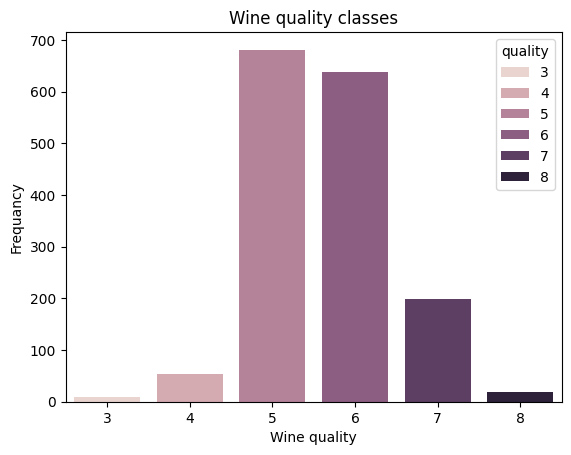

In [87]:
# plot a countplot to see quality distribution.
sns.countplot(x= wine_df['quality'], hue=wine_df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Wine quality classes');
plt.show()

Text(0, 0.5, 'Volatule Acidity')

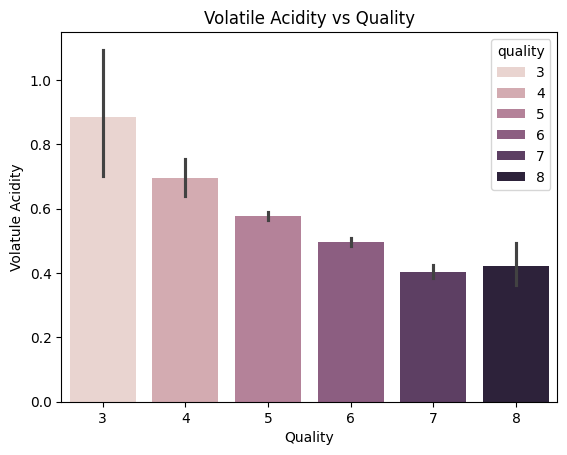

In [88]:
# plot quality vs volatile acidity

sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_df, hue="quality")
plt.title("Volatile Acidity vs Quality")
plt.xlabel("Quality")
plt.ylabel("Volatule Acidity")

Text(0, 0.5, 'Citric Acid')

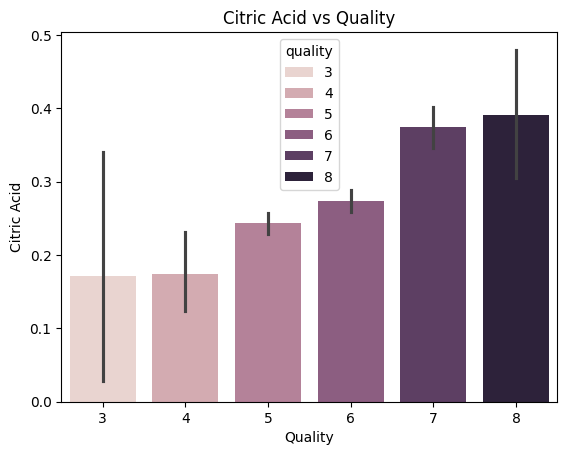

In [89]:
# plot quality vs citric acid

sns.barplot(x = 'quality', y = 'citric acid', data = wine_df, hue="quality")
plt.title("Citric Acid vs Quality")
plt.xlabel("Quality")
plt.ylabel("Citric Acid")

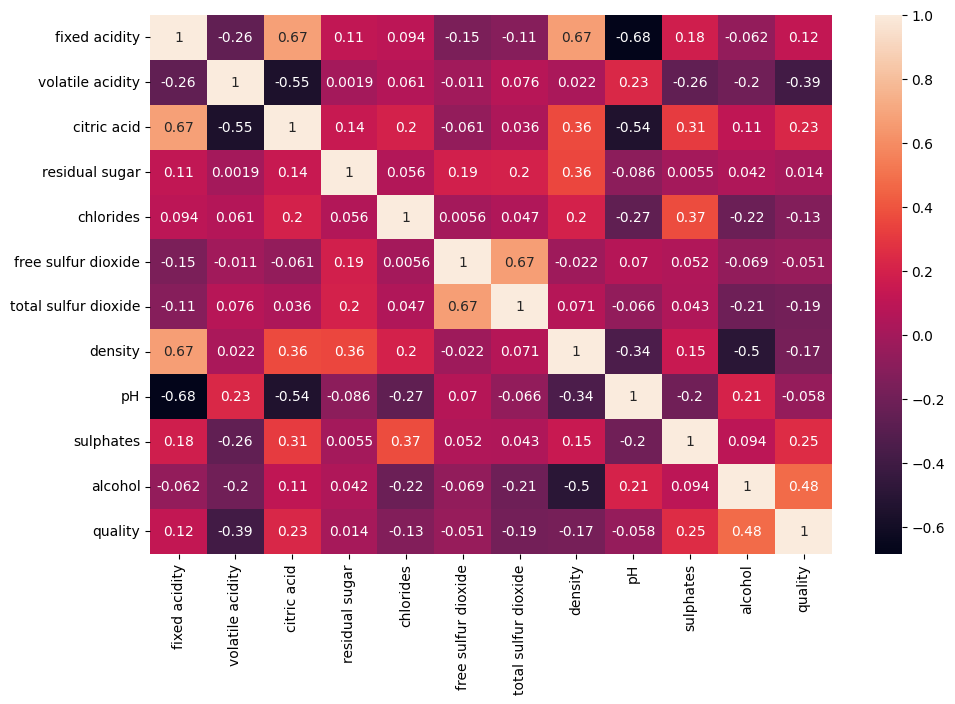

In [90]:
plt.figure(figsize = (11, 7))
sns.heatmap(wine_df.corr(), annot = True)
plt.show()

In [91]:
# Train test split
from sklearn.model_selection import train_test_split

X = wine_df.iloc[:, :-1]
y = wine_df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


### 3. Model Building

#### 3.1. DecisionTreeClassifier



In [92]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)
dtree_clf.score(X_train, y_train)

1.0

In [93]:
# Predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
dtree_clf_pred = dtree_clf.predict(X_test)

In [94]:
# Scores 
print(f"""1 Decision Tree Classification: 
Mean Absolute Error: {mean_absolute_error(y_test, dtree_clf_pred):.4f}
Mean Squared Error: {mean_squared_error(y_test, dtree_clf_pred):.4f}
""")

1 Decision Tree Classification: 
Mean Absolute Error: 0.5208
Mean Squared Error: 0.7064



In [95]:
# Print classification report 
print(classification_report(y_test, dtree_clf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.11      0.11        19
           5       0.68      0.63      0.65       217
           6       0.55      0.57      0.56       213
           7       0.44      0.53      0.48        70
           8       0.17      0.14      0.15         7

    accuracy                           0.56       528
   macro avg       0.32      0.33      0.33       528
weighted avg       0.57      0.56      0.56       528



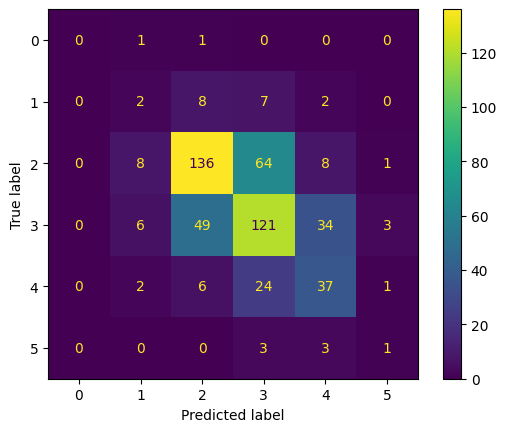

In [96]:
#Confusion Matrix 
cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dtree_clf_pred), display_labels = [0, 1, 2, 3, 4, 5])
cm_plot.plot()
plt.show()


#### 3.2. K-nearest neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_train, y_train)


0.6601307189542484

In [98]:
knn_clf_pred = knn_clf.predict(X_test)

In [99]:
# Scores 
print(f"""1 Decision Tree Classification: 
Mean Absolute Error: {mean_absolute_error(y_test, knn_clf_pred):.4f}
Mean Squared Error: {mean_squared_error(y_test, knn_clf_pred):.4f}
""")

1 Decision Tree Classification: 
Mean Absolute Error: 0.6117
Mean Squared Error: 0.8011



In [100]:
# Print classification report 
print(classification_report(y_test, knn_clf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.05      0.09        19
           5       0.51      0.61      0.55       217
           6       0.45      0.50      0.47       213
           7       0.48      0.19      0.27        70
           8       0.00      0.00      0.00         7

    accuracy                           0.48       528
   macro avg       0.28      0.22      0.23       528
weighted avg       0.46      0.48      0.46       528



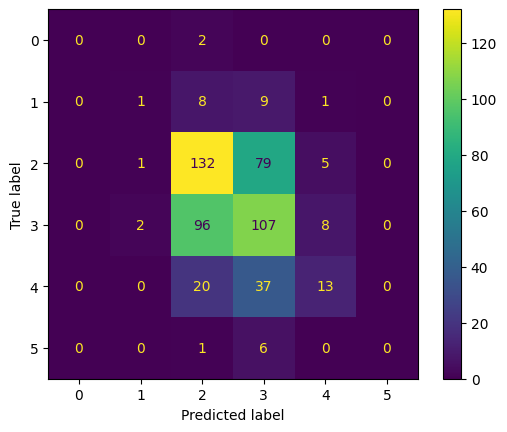

In [101]:
#Confusion Matrix 
cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, knn_clf_pred), display_labels = [0, 1, 2, 3, 4, 5])
cm_plot.plot()
plt.show()

#### 3.3 Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
rfc_clf = RandomForestClassifier(random_state= 42)

In [103]:
params = {
    'max_depth': range(10 , 60 , 10),
    'n_estimators': range(25 , 100 , 25)
}
rfc_clf = GridSearchCV(rfc_clf,param_grid= params,cv= 5,n_jobs= -1,verbose=1)


In [104]:
rfc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [105]:
cv_results = pd.DataFrame(rfc_clf.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.547069,0.048780,0.024242,0.005129,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.627907,0.644860,0.621495,0.705607,0.696262,0.659226,0.035025,1
14,0.399244,0.050506,0.011308,0.002716,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.600000,0.654206,0.649533,0.705607,0.682243,0.658318,0.035507,2
11,0.547286,0.037170,0.024351,0.003110,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.600000,0.654206,0.649533,0.705607,0.682243,0.658318,0.035507,2
8,0.520761,0.015031,0.020410,0.000599,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.600000,0.654206,0.649533,0.705607,0.682243,0.658318,0.035507,2
10,0.358747,0.021414,0.020968,0.007064,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.609302,0.649533,0.640187,0.672897,0.710280,0.656440,0.033774,5
7,0.348295,0.010864,0.014981,0.001433,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.609302,0.649533,0.640187,0.672897,0.710280,0.656440,0.033774,5
13,0.388398,0.036890,0.014280,0.001339,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.609302,0.649533,0.640187,0.672897,0.710280,0.656440,0.033774,5
1,0.395728,0.020936,0.018122,0.004034,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.623256,0.640187,0.616822,0.705607,0.696262,0.656427,0.037251,8
5,0.531561,0.024544,0.020774,0.001535,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.604651,0.649533,0.644860,0.696262,0.682243,0.655510,0.031972,9
4,0.361952,0.017184,0.016040,0.001920,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.618605,0.644860,0.630841,0.677570,0.705607,0.655497,0.031876,10


In [106]:
rfc_clf.best_params_

{'max_depth': 10, 'n_estimators': 75}

In [107]:
rfc_clf.score(X_train, y_train)

0.9505135387488328

In [108]:
rfc_clf_pred = rfc_clf.predict(X_test)

In [109]:
print(f"""1 Random Forest Classification: 
Mean Absolute Error: {mean_absolute_error(y_test, rfc_clf_pred):.4f}
Mean Squared Error: {mean_squared_error(y_test, rfc_clf_pred):.4f}
""")

1 Random Forest Classification: 
Mean Absolute Error: 0.3864
Mean Squared Error: 0.4470



In [110]:
# Print classification report 
print(classification_report(y_test, rfc_clf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.73      0.77      0.75       217
           6       0.59      0.69      0.64       213
           7       0.52      0.37      0.43        70
           8       0.00      0.00      0.00         7

    accuracy                           0.64       528
   macro avg       0.31      0.31      0.30       528
weighted avg       0.61      0.64      0.62       528



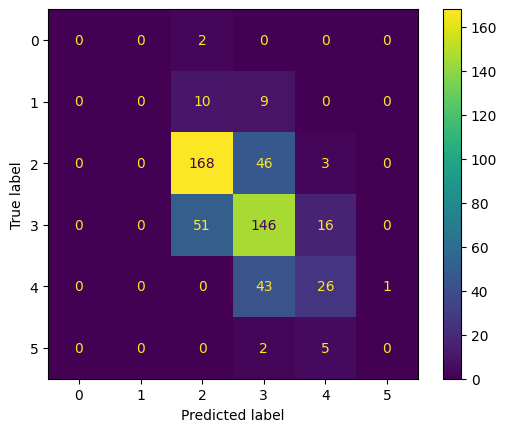

In [111]:
#Confusion Matrix 
cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rfc_clf_pred), display_labels = [0, 1, 2, 3, 4, 5])
cm_plot.plot()
plt.show()

### 4. Conclusions

In [114]:

score_dict = {"Models": ["Decision Tree", "K Nearest Neighbors", "Random Forest Classifier"],
              "Score": [dtree_clf.score(X_train, y_train),knn_clf.score(X_train, y_train),rfc_clf.score(X_train, y_train)]}

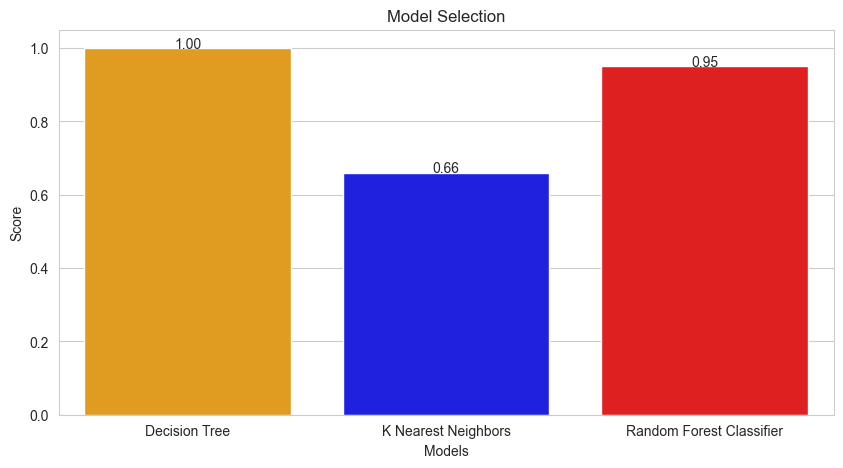

In [116]:
colors= ['orange' , 'blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=score_dict['Models'], y=score_dict['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=p.get_height(),
            s='{:.2f}'.format(p.get_height()),
            ha='center')

plt.show();